In [19]:
using DifferentialEquations
using Plots
include("src/Models.jl")
include("src/Params.jl");

In [29]:
# initial values and some params
U0 = 3.5
X0 = [U0, 0, 0, 0, 0, 0]
A0 = 1.0
fATP = 1.0

p = [kUTA, kTU, kTUA, kTDA, kDT, kDTA, kDS, kDSA, kSDA, kSU, kSUA, kUSA, kCIhyd,
     KA, A0, fATP, N, M]

tspan = (0.0, 100.0)

prob = ODEProblem(kaiabc_phong!, X0, tspan, p)
sol = solve(prob, reltol=1e-8, abstol=1e-8);

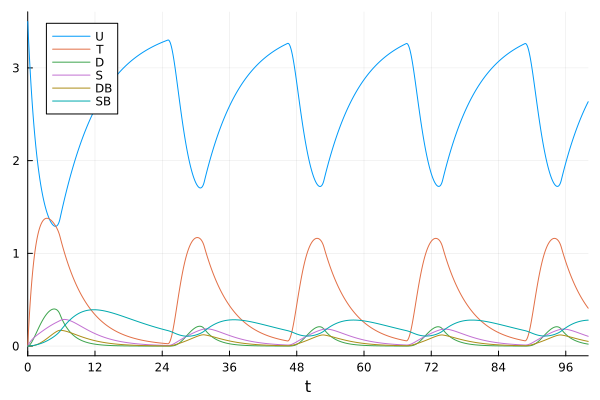

In [30]:
plot(sol, labels=reshape(["U", "T", "D", "S", "DB", "SB"], 1, :))
xticks!(0:12:96)

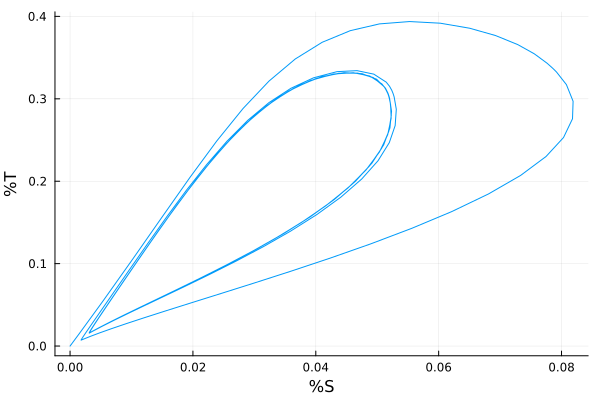

In [31]:
X = hcat(sol.u...)    # state first
pC = 1 .- X[1, :]./reshape(sum(X, dims=1), :, 1)
C_tot = reshape(sum(X, dims=1), :, 1)
plot(X[4, :]./C_tot, X[2, :]./C_tot, leg=false)
xlabel!("%S")
ylabel!("%T")

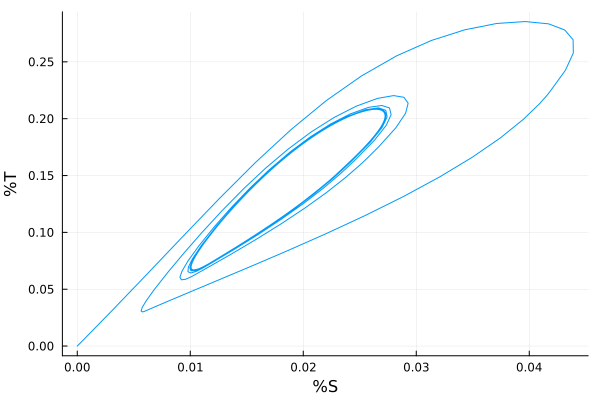

In [28]:
U0 = 3.5
X0 = [U0, 0, 0, 0, 0, 0]
A0 = 1.0
fATP = 0.4

p = [kUTA, kTU, kTUA, kTDA, kDT, kDTA, kDS, kDSA, kSDA, kSU, kSUA, kUSA, kCIhyd,
     KA, A0, fATP, N, M]

tspan = (0.0, 500.0)

prob = ODEProblem(kaiabc_phong!, X0, tspan, p)
sol = solve(prob, reltol=1e-8, abstol=1e-8);

X = hcat(sol.u...)    # state first
pC = 1 .- X[1, :]./reshape(sum(X, dims=1), :, 1)
C_tot = reshape(sum(X, dims=1), :, 1)
plot(X[4, :]./C_tot, X[2, :]./C_tot, leg=false)
xlabel!("%S")
ylabel!("%T")

In [7]:
# dX = fill(0.0, (6,))
# kaiabc_phong!(dX, [1.5, 2.0, 0, 0, 0, 0], p, 0)
# dX

6-element Vector{Float64}:
 -0.18928571428571428
 -0.15000000000000002
  0.28571428571428575
  0.053571428571428575
  0.0
  0.0

- Write an algorithm to find local minima and maxima
- use these to find amplitude and period (as a function of integration time)
- See if the amplitude converges ... and make a cutoff

## With growth

In [13]:
# initial values and some params
U0 = 3.5
X0 = [U0, 0, 0, 0, 0, 0]
A0 = 1.0
fATP = 1.0
tau = 6

p = [kUTA, kTU, kTUA, kTDA, kDT, kDTA, kDS, kDSA, kSDA, kSU, kSUA, kUSA, kCIhyd,
     KA, A0, fATP, N, M, tau, U0]

tspan = (0.0, 100.0)

prob_growing = ODEProblem(kaiabc_growing!, X0, tspan, p)
sol_growing = solve(prob_growing, saveat=0.1);

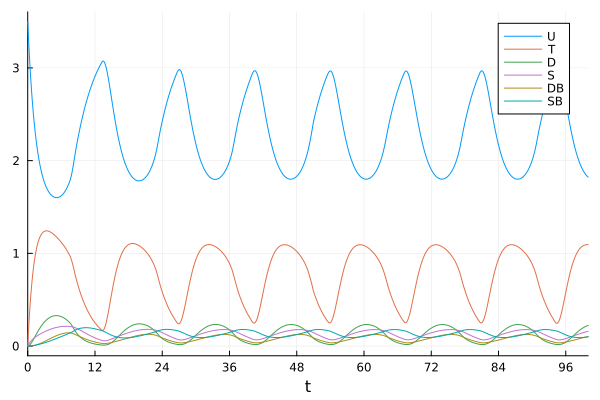

In [18]:
plot(sol_growing, labels=reshape(["U", "T", "D", "S", "DB", "SB"], 1, :))
xticks!(0:12:96)